In [2]:
#importing libraries and made a function for binary labels.

import cirq
import cirq_web
import numpy as np
import cirq_web.bloch_sphere as bloch_sphere
import matplotlib.pyplot as plt

#This is for the labels of different qubit states on the X axis. 
#The range is 2^num_qubits, bin(x) converts each number in the range to its binary representation
#zfill(num_qubits) pads the binary string with leading 0's to ensure that it has a fixed length equal to "num_qubits"
def binary_labels(num_qubits):
    return [bin(x)[2:].zfill(num_qubits) for x in range(2 ** num_qubits)]

In [3]:
#list of qubits, and printing them

qubits = [cirq.NamedQubit("q0"), cirq.NamedQubit("q1"), cirq.NamedQubit("q2")]
print(qubits[0], qubits[1], qubits[2])

q0 q1 q2


In [4]:
#list of qubits using the range method, then printing them

my_qubits = cirq.NamedQubit.range(3, prefix = "q")

print(my_qubits[0], my_qubits[1], my_qubits[2])

q0 q1 q2


In [5]:
#list of qubits using the range method, making a circuit, measuring the 1st qubit, then printing the circuit.
qubits = cirq.NamedQubit.range(3, prefix = "q")

qc = cirq.Circuit()

qc.append(cirq.measure(qubits[0]))

print(qc)

q0: ───M───


In [6]:
#making qubits using the range method, creating a circuit, measuring all 5 qubits then printing the circuit. 

qubits = cirq.NamedQubit.range(5, prefix = "q")
qc = cirq.Circuit()

qc.append(cirq.measure(qubits))

print(qc)

q0: ───M───
       │
q1: ───M───
       │
q2: ───M───
       │
q3: ───M───
       │
q4: ───M───


In [7]:
#making qubits using the range method, creating a circuit, then appended an X gate to the 1st qubit
#appended an Z gate to the 2nd qubit, and appended an H gate to the 3rd qubit
#then measuring all qubits, then printing the circuit.

qubits = cirq.NamedQubit.range(3, prefix = "q")
qc = cirq.Circuit()

qc.append(cirq.X(qubits[0]))
qc.append(cirq.Z(qubits[1]))
qc.append(cirq.H(qubits[2]))
qc.append(cirq.measure(qubits))

print(qc)

q0: ───X───M───
           │
q1: ───Z───M───
           │
q2: ───H───M───


In [8]:
#making qubits using the range method, creating a circuit. Appended the H gate to all qubits
#, added a measure to q0, added an X gate to q1, then a Z gate to q4, then added measurements to q3 and q4
#then printed the circuit

qubits = cirq.NamedQubit.range(5, prefix = "q")
qc = cirq.Circuit()

qc.append(cirq.H.on_each(qubits))
qc.append(cirq.measure(qubits[0]))
qc.append(cirq.X(qubits[1]))
qc.append(cirq.Z(qubits[4]))
qc.append(cirq.measure(qubits[3]))
qc.append(cirq.measure(qubits[4]))

print(qc)

q0: ───H───M───────

q1: ───H───X───────

q2: ───H───────────

q3: ───H───M───────

q4: ───H───Z───M───


In [9]:
#making qubits using the range method, creating a circuit, added an H gate to q0, then
# added a CNOT gate to q0 as the control qubit and q1 as the target qubit, then printed the circuit
# and printed the dirac notation. 

qubits = cirq.NamedQubit.range(2, prefix = "q")
qc = cirq.Circuit()

qc.append(cirq.H(qubits[0]))
qc.append(cirq.CNOT(qubits[0], qubits[1]))

print(qc)

vector = cirq.final_state_vector(qc)
ket = cirq.dirac_notation(state_vector = vector)

print(ket)

q0: ───H───@───
           │
q1: ───────X───
0.71|00⟩ + 0.71|11⟩


In [10]:
#added measurements to all qubits in the circuit
#printed the circuit.

qc.append(cirq.measure(qubits))
print(qc)

q0: ───H───@───M───
           │   │
q1: ───────X───M───


In [11]:
#printed the circuit and results

print(qc)
sim = cirq.Simulator()
result = sim.run(qc)

print(result)

q0: ───H───@───M───
           │   │
q1: ───────X───M───
q0,q1=1, 1


q0,q1=1111010001, 1111010001


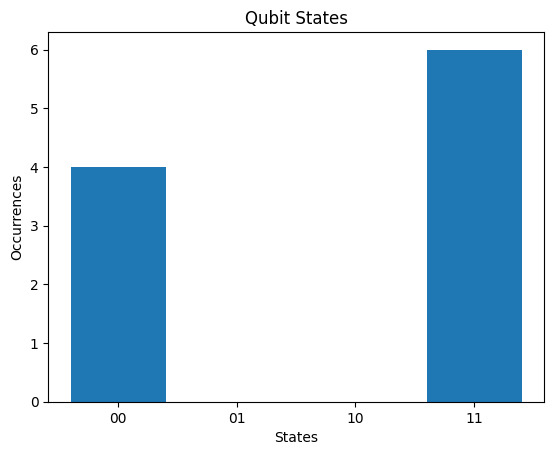

In [15]:
#ran the results 10 times, then generated a histogram of the results. 

result = sim.run(qc, repetitions = 10)

print(result)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

q0,q1=0001110100001100001000101101101100001010110100000000110001111110010011101011111111010000000001101000, 0001110100001100001000101101101100001010110100000000110001111110010011101011111111010000000001101000


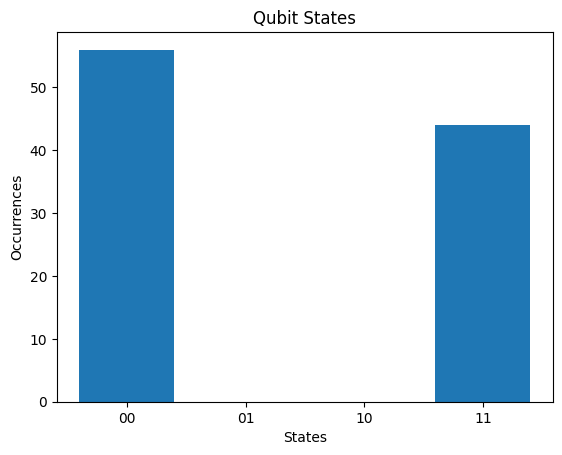

In [17]:
#ran the results 100 times, printed the result, then generated the histogram of the outcomes. 

result = sim.run(qc, repetitions = 100)

print(result)
hist = cirq.plot_state_histogram(result, plt.subplot(), title = 'Qubit States', xlabel = 'States', ylabel = 'Occurrences', tick_label=binary_labels(2))

plt.show()

In [18]:
#making qubits using the range method, creating a circuit, added an H gate to all qubits, 
#then added measurements to all qubits, then printed the circuit. 

qubits = cirq.NamedQubit.range(3, prefix = "q")
qc = cirq.Circuit()

qc.append(cirq.H.on_each(qubits))
qc.append(cirq.measure(qubits))

print(qc)

q0: ───H───M───
           │
q1: ───H───M───
           │
q2: ───H───M───


q0,q1,q2=0101110111010010011011101001001100001011000100101100001100111000010010100011100101111101001101011011, 1110110011010010111000110000101000100110011011001001000100110001001000010100001100011110110011000111, 1011110110101010111011111100010111101100010001101010011111101011111000100100111111101110000100000111


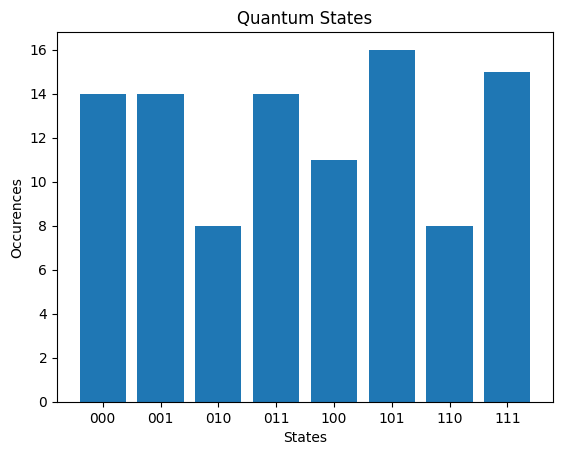

In [19]:
#ran the results 100 times, then generated a histogram of the outcomes

sim = cirq.Simulator()
result = sim.run(qc, repetitions = 100)

print(result)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = "Quantum States", xlabel = "States", ylabel = "Occurences", tick_label = binary_labels(3))

plt.show()

In [20]:
#making qubits using the range method, creating a circuit, added an H gate to q0
#Added a CNOT gate to q0 as the control and q1 as the target, then another CNOT gate
#with q1 as the control and q2 as the target, then added measurements to all qubits. 
#I then printed the circuit. 

qubits = cirq.NamedQubit.range(3, prefix = "q")
qc = cirq.Circuit()

qc.append(cirq.H(qubits[0]))
qc.append(cirq.CNOT(qubits[0], qubits[1]))
qc.append(cirq.CNOT(qubits[1], qubits[2]))
qc.append(cirq.measure(qubits))

print(qc)

q0: ───H───@───────M───
           │       │
q1: ───────X───@───M───
               │   │
q2: ───────────X───M───


q0,q1,q2=1100010010100001100100010100110011110001000111101010100011100010101111100000111010111010101000000101, 1100010010100001100100010100110011110001000111101010100011100010101111100000111010111010101000000101, 1100010010100001100100010100110011110001000111101010100011100010101111100000111010111010101000000101


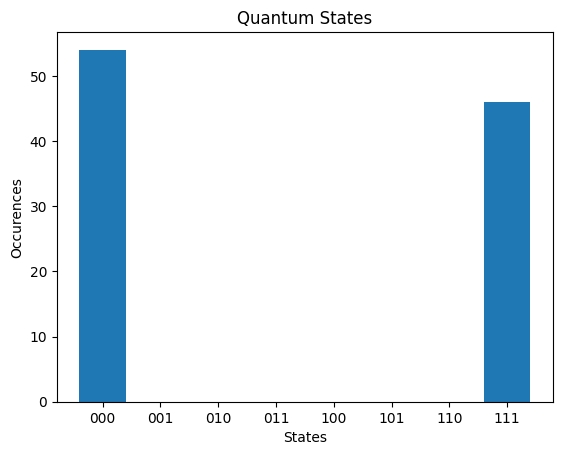

In [21]:
#ran the results of the circuit 100 times, then generated a histogram with those outcomes. 

sim = cirq.Simulator()
result = sim.run(qc, repetitions = 100)

print(result)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = "Quantum States", xlabel = "States", ylabel = "Occurences", tick_label = binary_labels(3))
plt.show()

In [22]:
#making qubits using the range method, creating a circuit, added H gates to all qubits, then a Z gate to q1, then 
#measurements to all qubits, then printing the circuit. 

qubits = cirq.NamedQubit.range(3, prefix = "q")
qc = cirq.Circuit()

qc.append(cirq.H.on_each(qubits))
qc.append(cirq.Z(qubits[1]))
qc.append(cirq.measure(qubits))

print(qc)


q0: ───H───────M───
               │
q1: ───H───Z───M───
               │
q2: ───H───────M───


q0: ───H───────M───
               │
q1: ───H───Z───M───
               │
q2: ───H───────M───


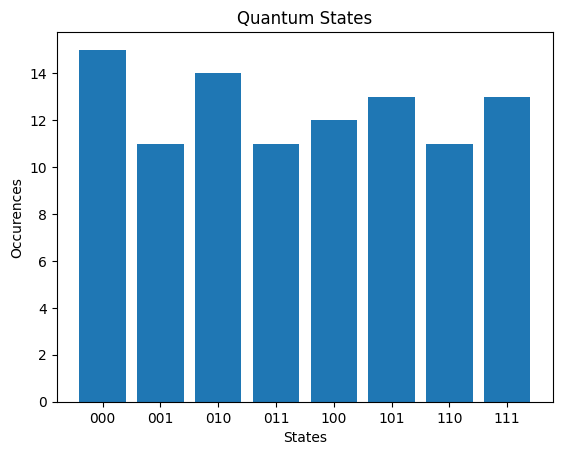

In [23]:
#printing the circuit, then running the results 100 times, then generating a histogram of the outcomes of the circuit. 

print(qc)

sim = cirq.Simulator()

result = sim.run(qc, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = "Quantum States", xlabel = "States", ylabel = "Occurences", tick_label = binary_labels(3))
plt.show()

In [24]:
#making qubits using the range method, creating a circuit, adding X gates to all qubits,
#an H and Z gate to q1, then measurements to all qubits, then printing the circuit. 

qubits = cirq.NamedQubit.range(3, prefix = "q")
qc = cirq.Circuit()

qc.append(cirq.X.on_each(qubits))
qc.append(cirq.H(qubits[1]))
qc.append(cirq.Z(qubits[1]))
qc.append(cirq.measure(qubits))

print(qc)

q0: ───X───────────M───
                   │
q1: ───X───H───Z───M───
                   │
q2: ───X───────────M───


q0: ───X───────────M───
                   │
q1: ───X───H───Z───M───
                   │
q2: ───X───────────M───


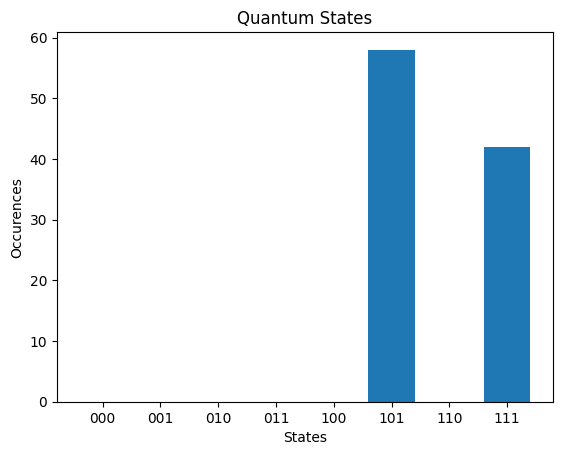

In [25]:
#printing the circuit, then ran the results 100 times, then generated a histogram of the outcomes of the circuit. 

print(qc)

sim = cirq.Simulator()

result = sim.run(qc, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = "Quantum States", xlabel = "States", ylabel = "Occurences", tick_label = binary_labels(3))
plt.show()

In [26]:
#making qubits using the range method, creating a circuit, adding an X gate to q0,
#an H and Z gate to q1, a CNOT gate with q0 as the control and q1 as the target, then measurements to all qubits, 
#then printing the circuit. 


qubits = cirq.NamedQubit.range(2, prefix = "q")
qc = cirq.Circuit()

qc.append(cirq.X(qubits[0]))
qc.append(cirq.H(qubits[1]))
qc.append(cirq.Z(qubits[1]))
qc.append(cirq.CNOT(qubits[0], qubits[1]))
qc.append(cirq.measure(qubits))

print(qc)

q0: ───X───────@───M───
               │   │
q1: ───H───Z───X───M───


q0: ───X───────@───M───
               │   │
q1: ───H───Z───X───M───
q0,q1=1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111, 0001101100111010111101011111110000100001101010001111101111101100111000001000110000000110011011101101


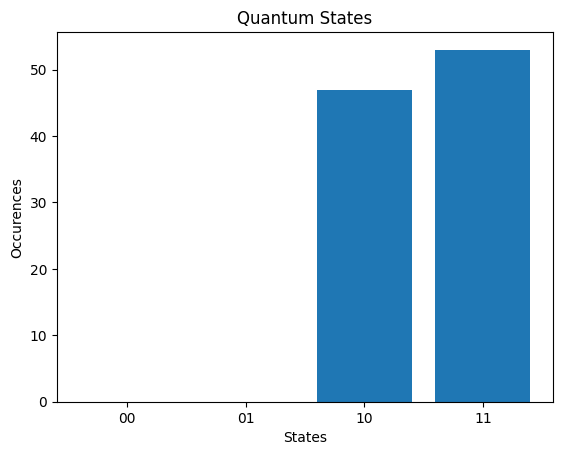

In [27]:
#printing the circuit, then ran the results 100 times, then generated a histogram of the outcomes of the circuit. 

print(qc)

sim = cirq.Simulator()

result = sim.run(qc, repetitions = 100)

print(result)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = "Quantum States", xlabel = "States", ylabel = "Occurences", tick_label = binary_labels(2))

plt.show()

In [28]:
#making qubits using the range method, creating a circuit, adding an H gate to q0, an X gate q1, 
#then a CNOT gate with q0 as the control and q1 as the target, then measurements for all qubits. 
#then printed the circuit

qubits = cirq.NamedQubit.range(2, prefix = "q")
qc = cirq.Circuit()

qc.append(cirq.H(qubits[0]))
qc.append(cirq.X(qubits[1]))
qc.append(cirq.CNOT(qubits[0], qubits[1]))
qc.append(cirq.measure(qubits))

print(qc)

q0: ───H───@───M───
           │   │
q1: ───X───X───M───


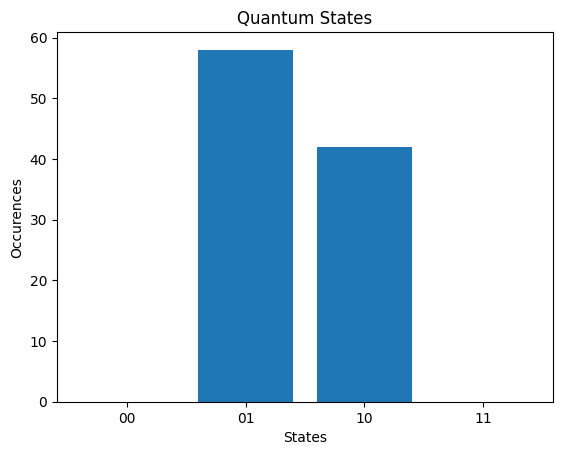

In [29]:
#printing the circuit, then ran the results 100 times, then generated a histogram of the outcomes of the circuit. 

sim = cirq.Simulator()

result = sim.run(qc, repetitions = 100)

hist = cirq.plot_state_histogram(result, plt.subplot(), title = "Quantum States", xlabel = "States", ylabel = "Occurences", tick_label = binary_labels(2))
plt.show()